# Pre-requisites for Tensorflow 2.0 and other imports


In [ ]:
# prerequisites for working with Tensorflow 2.0 rc
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
!nvidia-smi

Thu Nov 28 14:40:30 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
# To get data from gitlab
#!git clone https://<username>:<password>@gitlab.com/<project>
#!git clone https://<>:<>@gitlab.com/bhavanak93/master_thesis_dataset.git

Cloning into 'master_thesis_dataset'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 172 (delta 142), reused 172 (delta 142)
Receiving objects: 100% (172/172), 13.80 MiB | 6.66 MiB/s, done.
Resolving deltas: 100% (142/142), done.


# Data preparation


In [ ]:
# Data Preparation -> Room temperature data only
#path_rt = "/Users/bhavana/Work/MasterThesis/Data/allValves/"
#path_rt = "Z:/User/KrishnaMurthy/Work/data/exp_data/allValves/"
path_rt = "master_thesis_dataset/allValves/"

# use 100 readings of RT
rt_cols = [i for i in range(1,502)]

df_2103_rt = pd.read_csv(path_rt + '1021-03_500readings_100sPause.csv', index_col=0, usecols=rt_cols) 
df_2105_rt = pd.read_csv(path_rt + '1021-05_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2115_rt = pd.read_csv(path_rt + '1021-15_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2117_rt = pd.read_csv(path_rt + '1021-17_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2007_rt = pd.read_csv(path_rt + '1020-07_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2010_rt = pd.read_csv(path_rt + '1020-10_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2016_rt = pd.read_csv(path_rt + '1020-16_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2017_rt = pd.read_csv(path_rt + '1020-17_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2021_rt = pd.read_csv(path_rt + '1020-21_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2008_rt = pd.read_csv(path_rt + '1020-08_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2009_rt = pd.read_csv(path_rt + '1020-09_500readings_100sPause.csv', index_col=0, usecols=rt_cols)

In [ ]:
# Data Preparation -> Temperature data of 5 temperature values : 5def, 15 deg, 25deg, 35deg, 45deg
#path_temp = "/Users/bhavana/Work/MasterThesis/Data/tempData/"
#path_temp = "Z:/User/KrishnaMurthy/Work/data/exp_data/tempData/"
path_temp = "master_thesis_dataset/tempData/"

# use 100 readings of each temperature 
temp_cols = [i for i in range(1,102)]

# for 5degrees :
df_2103_05deg = pd.read_csv(path_temp + '1021-03_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols) 
df_2105_05deg = pd.read_csv(path_temp + '1021-05_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2115_05deg = pd.read_csv(path_temp + '1021-15_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2117_05deg = pd.read_csv(path_temp + '1021-17_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2007_05deg = pd.read_csv(path_temp + '1020-07_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2010_05deg = pd.read_csv(path_temp + '1020-10_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2016_05deg = pd.read_csv(path_temp + '1020-16_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2017_05deg = pd.read_csv(path_temp + '1020-17_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2021_05deg = pd.read_csv(path_temp + '1020-21_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2008_05deg = pd.read_csv(path_temp + '1020-08_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2009_05deg = pd.read_csv(path_temp + '1020-09_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)

# for 15degrees :
df_2103_15deg = pd.read_csv(path_temp + '1021-03_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols) 
df_2105_15deg = pd.read_csv(path_temp + '1021-05_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2115_15deg = pd.read_csv(path_temp + '1021-15_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2117_15deg = pd.read_csv(path_temp + '1021-17_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2007_15deg = pd.read_csv(path_temp + '1020-07_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2010_15deg = pd.read_csv(path_temp + '1020-10_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2016_15deg = pd.read_csv(path_temp + '1020-16_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2017_15deg = pd.read_csv(path_temp + '1020-17_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2021_15deg = pd.read_csv(path_temp + '1020-21_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2008_15deg = pd.read_csv(path_temp + '1020-08_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2009_15deg = pd.read_csv(path_temp + '1020-09_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)

# for 25degrees :
df_2103_25deg = pd.read_csv(path_temp + '1021-03_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols) 
df_2105_25deg = pd.read_csv(path_temp + '1021-05_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2115_25deg = pd.read_csv(path_temp + '1021-15_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2117_25deg = pd.read_csv(path_temp + '1021-17_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2007_25deg = pd.read_csv(path_temp + '1020-07_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2010_25deg = pd.read_csv(path_temp + '1020-10_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2016_25deg = pd.read_csv(path_temp + '1020-16_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2017_25deg = pd.read_csv(path_temp + '1020-17_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2021_25deg = pd.read_csv(path_temp + '1020-21_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2008_25deg = pd.read_csv(path_temp + '1020-08_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2009_25deg = pd.read_csv(path_temp + '1020-09_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)

# for 35degrees :
df_2103_35deg = pd.read_csv(path_temp + '1021-03_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols) 
df_2105_35deg = pd.read_csv(path_temp + '1021-05_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2115_35deg = pd.read_csv(path_temp + '1021-15_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2117_35deg = pd.read_csv(path_temp + '1021-17_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2007_35deg = pd.read_csv(path_temp + '1020-07_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2010_35deg = pd.read_csv(path_temp + '1020-10_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2016_35deg = pd.read_csv(path_temp + '1020-16_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2017_35deg = pd.read_csv(path_temp + '1020-17_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2021_35deg = pd.read_csv(path_temp + '1020-21_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2008_35deg = pd.read_csv(path_temp + '1020-08_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2009_35deg = pd.read_csv(path_temp + '1020-09_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)

# for 45degrees :
df_2103_45deg = pd.read_csv(path_temp + '1021-03_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols) 
df_2105_45deg = pd.read_csv(path_temp + '1021-05_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2115_45deg = pd.read_csv(path_temp + '1021-15_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2117_45deg = pd.read_csv(path_temp + '1021-17_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2007_45deg = pd.read_csv(path_temp + '1020-07_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2010_45deg = pd.read_csv(path_temp + '1020-10_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2016_45deg = pd.read_csv(path_temp + '1020-16_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2017_45deg = pd.read_csv(path_temp + '1020-17_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2021_45deg = pd.read_csv(path_temp + '1020-21_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2008_45deg = pd.read_csv(path_temp + '1020-08_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2009_45deg = pd.read_csv(path_temp + '1020-09_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)

In [ ]:
# Data Preparation -> Pressure data of 4 Pressure values : 
# 1bar, 2bar, 3bar, 4bar for upto 4bar valbves and 
# 1bar, 2bar, 4bar, 6bar for upto 8bar valves 

#path_pressure = "/Users/bhavana/Work/MasterThesis/Data/pressureData/"
#path_pressure = "Z:/User/KrishnaMurthy/Work/data/exp_data/pressureData/"
path_pressure = "master_thesis_dataset/pressureData/" 

# use 100 readings of each pressure 
temp_cols = [i for i in range(1,102)]

# for 1bar :
df_2103_1bar = pd.read_csv(path_pressure + '1021-03_1bar_100readings.csv', index_col=0, usecols=temp_cols) 
df_2105_1bar = pd.read_csv(path_pressure + '1021-05_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2115_1bar = pd.read_csv(path_pressure + '1021-15_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2117_1bar = pd.read_csv(path_pressure + '1021-17_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2007_1bar = pd.read_csv(path_pressure + '1020-07_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2010_1bar = pd.read_csv(path_pressure + '1020-10_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2016_1bar = pd.read_csv(path_pressure + '1020-16_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2017_1bar = pd.read_csv(path_pressure + '1020-17_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2021_1bar = pd.read_csv(path_pressure + '1020-21_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2008_1bar = pd.read_csv(path_pressure + '1020-08_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2009_1bar = pd.read_csv(path_pressure + '1020-09_1bar_100readings.csv', index_col=0, usecols=temp_cols)

# for 2 bar :
df_2103_2bar = pd.read_csv(path_pressure + '1021-03_2bar_100readings.csv', index_col=0, usecols=temp_cols) 
df_2105_2bar = pd.read_csv(path_pressure + '1021-05_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2115_2bar = pd.read_csv(path_pressure + '1021-15_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2117_2bar = pd.read_csv(path_pressure + '1021-17_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2007_2bar = pd.read_csv(path_pressure + '1020-07_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2010_2bar = pd.read_csv(path_pressure + '1020-10_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2016_2bar = pd.read_csv(path_pressure + '1020-16_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2017_2bar = pd.read_csv(path_pressure + '1020-17_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2021_2bar = pd.read_csv(path_pressure + '1020-21_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2008_2bar = pd.read_csv(path_pressure + '1020-08_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2009_2bar = pd.read_csv(path_pressure + '1020-09_2bar_100readings.csv', index_col=0, usecols=temp_cols)

# for 3 bar :
df_2007_3bar = pd.read_csv(path_pressure + '1020-07_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2010_3bar = pd.read_csv(path_pressure + '1020-10_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2016_3bar = pd.read_csv(path_pressure + '1020-16_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2017_3bar = pd.read_csv(path_pressure + '1020-17_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2021_3bar = pd.read_csv(path_pressure + '1020-21_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2008_3bar = pd.read_csv(path_pressure + '1020-08_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2009_3bar = pd.read_csv(path_pressure + '1020-09_3bar_100readings.csv', index_col=0, usecols=temp_cols)

# for 4 bar :
df_2103_4bar = pd.read_csv(path_pressure + '1021-03_4bar_100readings.csv', index_col=0, usecols=temp_cols) 
df_2105_4bar = pd.read_csv(path_pressure + '1021-05_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2115_4bar = pd.read_csv(path_pressure + '1021-15_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2117_4bar = pd.read_csv(path_pressure + '1021-17_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2007_4bar = pd.read_csv(path_pressure + '1020-07_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2010_4bar = pd.read_csv(path_pressure + '1020-10_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2016_4bar = pd.read_csv(path_pressure + '1020-16_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2017_4bar = pd.read_csv(path_pressure + '1020-17_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2021_4bar = pd.read_csv(path_pressure + '1020-21_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2008_4bar = pd.read_csv(path_pressure + '1020-08_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2009_4bar = pd.read_csv(path_pressure + '1020-09_4bar_100readings.csv', index_col=0, usecols=temp_cols)

# for 6 bar :
df_2103_6bar = pd.read_csv(path_pressure + '1021-03_6bar_100readings.csv', index_col=0, usecols=temp_cols) 
df_2105_6bar = pd.read_csv(path_pressure + '1021-05_6bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2115_6bar = pd.read_csv(path_pressure + '1021-15_6bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2117_6bar = pd.read_csv(path_pressure + '1021-17_6bar_100readings.csv', index_col=0, usecols=temp_cols)

PREPARE TRAINING DATA DICTIONARY

# Without window of inflection concept

In [ ]:
# consolidate all current readings into 1 main dictionary

dataDict = {'2103': {'rt': df_2103_rt.values/15, 
                     '1bar': df_2103_1bar.values/15, 
                     '2bar': df_2103_2bar.values/15, 
                     '4bar': df_2103_4bar.values/15, 
                     '6bar': df_2103_6bar.values/15, 
                     '05deg': (df_2103_05deg.values/15)[:, :80], 
                     '15deg': (df_2103_15deg.values/15)[:, :80], 
                     '25deg': (df_2103_25deg.values/15)[:, :80], 
                     '35deg': (df_2103_35deg.values/15)[:, :80], 
                     '45deg': (df_2103_45deg.values/15)[:, :80]}, 
           '2105': { 'rt': (df_2105_rt.values/15)[:, :13], 
                     '1bar': (df_2105_1bar.values/15)[:, :13], 
                     '2bar': (df_2105_2bar.values/15)[:, :13], 
                     '4bar': (df_2105_4bar.values/15)[:, :13], 
                     '6bar': (df_2105_6bar.values/15)[:, :13], 
                     '05deg': (df_2105_05deg.values/15)[:, :13], 
                     '15deg': (df_2105_15deg.values/15)[:, :13], 
                     '25deg': (df_2105_25deg.values/15)[:, :13], 
                     '35deg': (df_2105_35deg.values/15)[:, :13], 
                     '45deg': (df_2105_45deg.values/15)[:, :13]},
            '2115': {'rt': (df_2115_rt.values/15)[:, :13], 
                     '1bar': (df_2115_1bar.values/15)[:, :13], 
                     '2bar': (df_2115_2bar.values/15)[:, :13], 
                     '4bar': (df_2115_4bar.values/15)[:, :13], 
                     '6bar': (df_2115_6bar.values/15)[:, :13], 
                     '05deg': (df_2115_05deg.values/15)[:, :13], 
                     '15deg': (df_2115_15deg.values/15)[:, :13], 
                     '25deg': (df_2115_25deg.values/15)[:, :13], 
                     '35deg': (df_2115_35deg.values/15)[:, :13], 
                     '45deg': (df_2115_45deg.values/15)[:, :13]}, 
            '2117': {'rt': (df_2117_rt.values/15)[:, :13], 
                     '1bar': (df_2117_1bar.values/15)[:, :13], 
                     '2bar': (df_2117_2bar.values/15)[:, :13], 
                     '4bar': (df_2117_4bar.values/15)[:, :13], 
                     '6bar': (df_2117_6bar.values/15)[:, :13], 
                     '05deg': (df_2117_05deg.values/15)[:, :13], 
                     '15deg': (df_2117_15deg.values/15)[:, :13], 
                     '25deg': (df_2117_25deg.values/15)[:, :13], 
                     '35deg': (df_2117_35deg.values/15)[:, :13], 
                     '45deg': (df_2117_45deg.values/15)[:, :13]},
            '2007': {'rt': (df_2007_rt.values/15)[:, :13], 
                     '1bar': (df_2007_1bar.values/15)[:, :13], 
                     '2bar': (df_2007_2bar.values/15)[:, :13], 
                     '3bar': (df_2007_3bar.values/15)[:, :13], 
                     '4bar': (df_2007_4bar.values/15)[:, :13], 
                     '05deg': (df_2007_05deg.values/15)[:, :13], 
                     '15deg': (df_2007_15deg.values/15)[:, :13], 
                     '25deg': (df_2007_25deg.values/15)[:, :13], 
                     '35deg': (df_2007_35deg.values/15)[:, :13], 
                     '45deg': (df_2007_45deg.values/15)[:, :13]},
            '2010': {'rt': (df_2010_rt.values/15)[:, :13], 
                     '1bar': (df_2010_1bar.values/15)[:, :13], 
                     '2bar': (df_2010_2bar.values/15)[:, :13], 
                     '3bar': (df_2010_3bar.values/15)[:, :13], 
                     '4bar': (df_2010_4bar.values/15)[:, :13], 
                     '05deg': (df_2010_05deg.values/15)[:, :13], 
                     '15deg': (df_2010_15deg.values/15)[:, :13], 
                     '25deg': (df_2010_25deg.values/15)[:, :13], 
                     '35deg': (df_2010_35deg.values/15)[:, :13], 
                     '45deg': (df_2010_45deg.values/15)[:, :13]},
            '2016': {'rt': (df_2016_rt.values/15)[:, :13], 
                     '1bar': (df_2016_1bar.values/15)[:, :13], 
                     '2bar': (df_2016_2bar.values/15)[:, :13], 
                     '3bar': (df_2016_3bar.values/15)[:, :13], 
                     '4bar': (df_2016_4bar.values/15)[:, :13], 
                     '05deg': (df_2016_05deg.values/15)[:, :13], 
                     '15deg': (df_2016_15deg.values/15)[:, :13], 
                     '25deg': (df_2016_25deg.values/15)[:, :13], 
                     '35deg': (df_2016_35deg.values/15)[:, :13], 
                     '45deg': (df_2016_45deg.values/15)[:, :13]},
            '2017': {'rt': (df_2017_rt.values/15)[:, :13], 
                     '1bar': (df_2017_1bar.values/15)[:, :13], 
                     '2bar': (df_2017_2bar.values/15)[:, :13], 
                     '3bar': (df_2017_3bar.values/15)[:, :13], 
                     '4bar': (df_2017_4bar.values/15)[:, :13], 
                     '05deg': (df_2017_05deg.values/15)[:, :13], 
                     '15deg': (df_2017_15deg.values/15)[:, :13], 
                     '25deg': (df_2017_25deg.values/15)[:, :13], 
                     '35deg': (df_2017_35deg.values/15)[:, :13], 
                     '45deg': (df_2017_45deg.values/15)[:, :13]},
            '2021': {'rt': (df_2021_rt.values/15)[:, :13], 
                     '1bar': (df_2021_1bar.values/15)[:, :13], 
                     '2bar': (df_2021_2bar.values/15)[:, :13], 
                     '3bar': (df_2021_3bar.values/15)[:, :13], 
                     '4bar': (df_2021_4bar.values/15)[:, :13], 
                     '05deg': (df_2021_05deg.values/15)[:, :13], 
                     '15deg': (df_2021_15deg.values/15)[:, :13], 
                     '25deg': (df_2021_25deg.values/15)[:, :13], 
                     '35deg': (df_2021_35deg.values/15)[:, :13], 
                     '45deg': (df_2021_45deg.values/15)[:, :13]},
            '2008': {'rt': (df_2008_rt.values/4)[:, :13], 
                     '1bar': (df_2008_1bar.values/4)[:, :13], 
                     '2bar': (df_2008_2bar.values/4)[:, :13], 
                     '3bar': (df_2008_3bar.values/4)[:, :13], 
                     '4bar': (df_2008_4bar.values/4)[:, :13], 
                     '05deg': (df_2008_05deg.values/4)[:, :13], 
                     '15deg': (df_2008_15deg.values/4)[:, :13], 
                     '25deg': (df_2008_25deg.values/4)[:, :13], 
                     '35deg': (df_2008_35deg.values/4)[:, :13], 
                     '45deg': (df_2008_45deg.values/4)[:, :13]},
            '2009': {'rt': (df_2009_rt.values/4)[:, :13], 
                     '1bar': (df_2009_1bar.values/4)[:, :13], 
                     '2bar': (df_2009_2bar.values/4)[:, :13], 
                     '3bar': (df_2009_3bar.values/4)[:, :13], 
                     '4bar': (df_2009_4bar.values/4)[:, :13], 
                     '05deg': (df_2009_05deg.values/4)[:, :13], 
                     '15deg': (df_2009_15deg.values/4)[:, :13], 
                     '25deg': (df_2009_25deg.values/4)[:, :13], 
                     '35deg': (df_2009_35deg.values/4)[:, :13], 
                     '45deg': (df_2009_45deg.values/4)[:, :13]}
           }

PREPARE TRAINING DATA DICTIONARY


# With window of inflection concept

In [ ]:
# consolidate all current readings into 1 main dictionary

dataDict = {'2103': {'rt': df_2103_rt.values[790:1790]/15, 
                     '1bar': df_2103_1bar.values[790:1790]/15, 
                     '2bar': df_2103_2bar.values[790:1790]/15, 
                     '4bar': df_2103_4bar.values[790:1790]/15, 
                     '6bar': df_2103_6bar.values[790:1790]/15, 
                     '05deg': (df_2103_05deg.values[790:1790]/15)[:, :80], 
                     '15deg': (df_2103_15deg.values[790:1790]/15)[:, :80], 
                     '25deg': (df_2103_25deg.values[790:1790]/15)[:, :80], 
                     '35deg': (df_2103_35deg.values[790:1790]/15)[:, :80], 
                     '45deg': (df_2103_45deg.values[790:1790]/15)[:, :80]}, 
           '2105': { 'rt': (df_2105_rt.values[790:1790]/15)[:, :13], 
                     '1bar': (df_2105_1bar.values[790:1790]/15)[:, :13], 
                     '2bar': (df_2105_2bar.values[790:1790]/15)[:, :13], 
                     '4bar': (df_2105_4bar.values[790:1790]/15)[:, :13], 
                     '6bar': (df_2105_6bar.values[790:1790]/15)[:, :13], 
                     '05deg': (df_2105_05deg.values[790:1790]/15)[:, :13], 
                     '15deg': (df_2105_15deg.values[790:1790]/15)[:, :13], 
                     '25deg': (df_2105_25deg.values[790:1790]/15)[:, :13], 
                     '35deg': (df_2105_35deg.values[790:1790]/15)[:, :13], 
                     '45deg': (df_2105_45deg.values[790:1790]/15)[:, :13]},
            '2115': {'rt': (df_2115_rt.values[790:1790]/15)[:, :13], 
                     '1bar': (df_2115_1bar.values[790:1790]/15)[:, :13], 
                     '2bar': (df_2115_2bar.values[790:1790]/15)[:, :13], 
                     '4bar': (df_2115_4bar.values[790:1790]/15)[:, :13], 
                     '6bar': (df_2115_6bar.values[790:1790]/15)[:, :13], 
                     '05deg': (df_2115_05deg.values[790:1790]/15)[:, :13], 
                     '15deg': (df_2115_15deg.values[790:1790]/15)[:, :13], 
                     '25deg': (df_2115_25deg.values[790:1790]/15)[:, :13], 
                     '35deg': (df_2115_35deg.values[790:1790]/15)[:, :13], 
                     '45deg': (df_2115_45deg.values[790:1790]/15)[:, :13]}, 
            '2117': {'rt': (df_2117_rt.values[790:1790]/15)[:, :13], 
                     '1bar': (df_2117_1bar.values[790:1790]/15)[:, :13], 
                     '2bar': (df_2117_2bar.values[790:1790]/15)[:, :13], 
                     '4bar': (df_2117_4bar.values[790:1790]/15)[:, :13], 
                     '6bar': (df_2117_6bar.values[790:1790]/15)[:, :13], 
                     '05deg': (df_2117_05deg.values[790:1790]/15)[:, :13], 
                     '15deg': (df_2117_15deg.values[790:1790]/15)[:, :13], 
                     '25deg': (df_2117_25deg.values[790:1790]/15)[:, :13], 
                     '35deg': (df_2117_35deg.values[790:1790]/15)[:, :13], 
                     '45deg': (df_2117_45deg.values[790:1790]/15)[:, :13]},
            '2007': {'rt': (df_2007_rt.values[790:1790]/15)[:, :13], 
                     '1bar': (df_2007_1bar.values[790:1790]/15)[:, :13], 
                     '2bar': (df_2007_2bar.values[790:1790]/15)[:, :13], 
                     '3bar': (df_2007_3bar.values[790:1790]/15)[:, :13], 
                     '4bar': (df_2007_4bar.values[790:1790]/15)[:, :13], 
                     '05deg': (df_2007_05deg.values[790:1790]/15)[:, :13], 
                     '15deg': (df_2007_15deg.values[790:1790]/15)[:, :13], 
                     '25deg': (df_2007_25deg.values[790:1790]/15)[:, :13], 
                     '35deg': (df_2007_35deg.values[790:1790]/15)[:, :13], 
                     '45deg': (df_2007_45deg.values[790:1790]/15)[:, :13]},
            '2010': {'rt': (df_2010_rt.values[790:1790]/15)[:, :13], 
                     '1bar': (df_2010_1bar.values[790:1790]/15)[:, :13], 
                     '2bar': (df_2010_2bar.values[790:1790]/15)[:, :13], 
                     '3bar': (df_2010_3bar.values[790:1790]/15)[:, :13], 
                     '4bar': (df_2010_4bar.values[790:1790]/15)[:, :13], 
                     '05deg': (df_2010_05deg.values[790:1790]/15)[:, :13], 
                     '15deg': (df_2010_15deg.values[790:1790]/15)[:, :13], 
                     '25deg': (df_2010_25deg.values[790:1790]/15)[:, :13], 
                     '35deg': (df_2010_35deg.values[790:1790]/15)[:, :13], 
                     '45deg': (df_2010_45deg.values[790:1790]/15)[:, :13]},
            '2016': {'rt': (df_2016_rt.values[790:1790]/15)[:, :13], 
                     '1bar': (df_2016_1bar.values[790:1790]/15)[:, :13], 
                     '2bar': (df_2016_2bar.values[790:1790]/15)[:, :13], 
                     '3bar': (df_2016_3bar.values[790:1790]/15)[:, :13], 
                     '4bar': (df_2016_4bar.values[790:1790]/15)[:, :13], 
                     '05deg': (df_2016_05deg.values[790:1790]/15)[:, :13], 
                     '15deg': (df_2016_15deg.values[790:1790]/15)[:, :13], 
                     '25deg': (df_2016_25deg.values[790:1790]/15)[:, :13], 
                     '35deg': (df_2016_35deg.values[790:1790]/15)[:, :13], 
                     '45deg': (df_2016_45deg.values[790:1790]/15)[:, :13]},
            '2017': {'rt': (df_2017_rt.values[790:1790]/15)[:, :13], 
                     '1bar': (df_2017_1bar.values[790:1790]/15)[:, :13], 
                     '2bar': (df_2017_2bar.values[790:1790]/15)[:, :13], 
                     '3bar': (df_2017_3bar.values[790:1790]/15)[:, :13], 
                     '4bar': (df_2017_4bar.values[790:1790]/15)[:, :13], 
                     '05deg': (df_2017_05deg.values[790:1790]/15)[:, :13], 
                     '15deg': (df_2017_15deg.values[790:1790]/15)[:, :13], 
                     '25deg': (df_2017_25deg.values[790:1790]/15)[:, :13], 
                     '35deg': (df_2017_35deg.values[790:1790]/15)[:, :13], 
                     '45deg': (df_2017_45deg.values[790:1790]/15)[:, :13]},
            '2021': {'rt': (df_2021_rt.values[790:1790]/15)[:, :13], 
                     '1bar': (df_2021_1bar.values[790:1790]/15)[:, :13], 
                     '2bar': (df_2021_2bar.values[790:1790]/15)[:, :13], 
                     '3bar': (df_2021_3bar.values[790:1790]/15)[:, :13], 
                     '4bar': (df_2021_4bar.values[790:1790]/15)[:, :13], 
                     '05deg': (df_2021_05deg.values[790:1790]/15)[:, :13], 
                     '15deg': (df_2021_15deg.values[790:1790]/15)[:, :13], 
                     '25deg': (df_2021_25deg.values[790:1790]/15)[:, :13], 
                     '35deg': (df_2021_35deg.values[790:1790]/15)[:, :13], 
                     '45deg': (df_2021_45deg.values[790:1790]/15)[:, :13]},
            '2008': {'rt': (df_2008_rt.values[790:1790]/4)[:, :13], 
                     '1bar': (df_2008_1bar.values[790:1790]/4)[:, :13], 
                     '2bar': (df_2008_2bar.values[790:1790]/4)[:, :13], 
                     '3bar': (df_2008_3bar.values[790:1790]/4)[:, :13], 
                     '4bar': (df_2008_4bar.values[790:1790]/4)[:, :13], 
                     '05deg': (df_2008_05deg.values[790:1790]/4)[:, :13], 
                     '15deg': (df_2008_15deg.values[790:1790]/4)[:, :13], 
                     '25deg': (df_2008_25deg.values[790:1790]/4)[:, :13], 
                     '35deg': (df_2008_35deg.values[790:1790]/4)[:, :13], 
                     '45deg': (df_2008_45deg.values[790:1790]/4)[:, :13]},
            '2009': {'rt': (df_2009_rt.values[790:1790]/4)[:, :13], 
                     '1bar': (df_2009_1bar.values[790:1790]/4)[:, :13], 
                     '2bar': (df_2009_2bar.values[790:1790]/4)[:, :13], 
                     '3bar': (df_2009_3bar.values[790:1790]/4)[:, :13], 
                     '4bar': (df_2009_4bar.values[790:1790]/4)[:, :13], 
                     '05deg': (df_2009_05deg.values[790:1790]/4)[:, :13], 
                     '15deg': (df_2009_15deg.values[790:1790]/4)[:, :13], 
                     '25deg': (df_2009_25deg.values[790:1790]/4)[:, :13], 
                     '35deg': (df_2009_35deg.values[790:1790]/4)[:, :13], 
                     '45deg': (df_2009_45deg.values[790:1790]/4)[:, :13]}
           }

# Define labels for binary classification

In [ ]:
# dict for valve labels 
label_dict = {'2103': 0, # only one good valve
              '2105': 1, 
              '2115': 1, 
              '2117': 1, 
              '2007': 1, 
              '2010': 1, 
              '2016': 1, 
              '2017': 1, 
              '2021': 1, 
              '2008': 1, 
              '2009': 1}

ORGANIZE TRAINING AND VALIDATION DATA 

# Without added Gaussian noise

In [ ]:
# Preparing the training and validation sets
training_data = []
training_labels = []
les50count = 0
les80count = 0
validation_data = []
validation_labels = []
for i in range(0, 100):
    for valve in dataDict.keys():
        for param in dataDict[valve].keys():
            if 'deg' in param:
                t_str = param.split('d')[0]
                if (i<50):
                    training_data.append(dataDict[valve][param][:,i])
                    training_labels.append(label_dict[valve])
                    les50count+=1
                    #if (valve=='2103'):
                    #    training_data.append(dataDict[valve][param][:,i])
                    #    training_labels.append(label_dict[valve])
                elif (i<80):
                    validation_data.append(dataDict[valve][param][:,i])
                    validation_labels.append(label_dict[valve])
                    les80count+=1
                else: 
                    pass
            else:
                if 'bar' in param:
                    p_str = param.split('b')[0]
                elif 'rt' in param:
                    p_str = '1.01'
                else:
                    pass
                if (i<70):
                    training_data.append(dataDict[valve][param][:,i])
                    training_labels.append(label_dict[valve])
                else:
                    validation_data.append(dataDict[valve][param][:,i])
                    validation_labels.append(label_dict[valve])

In [ ]:
X_train = np.array(training_data, dtype='float')
y_train = np.array(training_labels)

X_val = np.array(validation_data, dtype='float')
y_val = np.array(validation_labels)

In [ ]:
print(les50count)
print(les80count)

2750
1650


In [ ]:
print(X_train.shape)
print(X_val.shape)

(6600, 2000)
(3300, 2000)


# With added Gaussian noise

In [ ]:
def add_noise():
    mul_factor= 0.004
    noise = mul_factor * np.random.normal(0, 1, 1000)
    return noise

# Preparing the training and validation sets
training_data = []
training_labels = []
validation_data = []
validation_labels = []
for valve in dataDict.keys():
    for param in dataDict[valve].keys():
        if dataDict[valve][param].shape[1] == 500:
            for i in range (0,500):
                if (i<350):
                    training_data.append(dataDict[valve][param][:, i] + add_noise())
                    #param=rt
                    #print("valve is %s param is %s "%(valve,param))
                    training_labels.append(0)
                else:
                    validation_data.append(dataDict[valve][param][:, i] + add_noise())
                    validation_labels.append(0)
        elif dataDict[valve][param].shape[1] == 80:
            for i in range(0,80):
                if (i<56):
                    training_data.append(dataDict[valve][param][:, i] + add_noise())
                    #param=temp
                    #print("valve is %s param is %s "%(valve,param))
                    training_labels.append(0)
                else:
                    validation_data.append(dataDict[valve][param][:, i] + add_noise())
                    validation_labels.append(0)
        elif dataDict[valve][param].shape[1] == 100:
            for i in range(0, 100):
                if (i<70):
                    training_data.append(dataDict[valve][param][:, i] + add_noise())
                    #param=press
                    #print("valve is %s param is %s "%(valve,param))
                    training_labels.append(0)
                else:
                    validation_data.append(dataDict[valve][param][:, i] + add_noise())
                    validation_labels.append(0)
        elif (dataDict[valve][param].shape[1] == 13) and ('rt' in param):
            for i in range(0, 13):
                if (i<10):
                    training_data.append(dataDict[valve][param][:, i] + add_noise())
                    #print("valve is %s "%valve)
                    training_labels.append(1)
                else:
                    validation_data.append(dataDict[valve][param][:, i] + add_noise())
                    validation_labels.append(1)
        elif dataDict[valve][param].shape[1] == 13 and ('deg' in param or 'bar' in param):
            for i in range(0, 13):
                if (i<9):
                    training_data.append(dataDict[valve][param][:, i] + add_noise())
                    #print("valve is %s "%valve)
                    training_labels.append(1)
                else:
                    validation_data.append(dataDict[valve][param][:, i] + add_noise())
                    validation_labels.append(1)
        else:
            pass

# Balanced dataset for binary classification

In [ ]:
# Preparing the training and validation sets
training_data = []
training_labels = []
validation_data = []
validation_labels = []
for valve in dataDict.keys():
    for param in dataDict[valve].keys():
        if dataDict[valve][param].shape[1] == 500:
            for i in range (0,500):
                if (i<350):
                    training_data.append(dataDict[valve][param][:, i])
                    #param=rt
                    #print("valve is %s param is %s "%(valve,param))
                    training_labels.append(0)
                else:
                    validation_data.append(dataDict[valve][param][:, i])
                    validation_labels.append(0)
        elif dataDict[valve][param].shape[1] == 80:
            for i in range(0,80):
                if (i<56):
                    training_data.append(dataDict[valve][param][:, i])
                    #param=temp
                    #print("valve is %s param is %s "%(valve,param))
                    training_labels.append(0)
                else:
                    validation_data.append(dataDict[valve][param][:, i])
                    validation_labels.append(0)
        elif dataDict[valve][param].shape[1] == 100:
            for i in range(0, 100):
                if (i<70):
                    training_data.append(dataDict[valve][param][:, i])
                    #param=press
                    #print("valve is %s param is %s "%(valve,param))
                    training_labels.append(0)
                else:
                    validation_data.append(dataDict[valve][param][:, i])
                    validation_labels.append(0)
        elif (dataDict[valve][param].shape[1] == 13) and ('rt' in param):
            for i in range(0, 13):
                if (i<10):
                    training_data.append(dataDict[valve][param][:, i])
                    #print("valve is %s "%valve)
                    training_labels.append(1)
                else:
                    validation_data.append(dataDict[valve][param][:, i])
                    validation_labels.append(1)
        elif dataDict[valve][param].shape[1] == 13 and ('deg' in param or 'bar' in param):
            for i in range(0, 13):
                if (i<9):
                    training_data.append(dataDict[valve][param][:, i])
                    #print("valve is %s "%valve)
                    training_labels.append(1)
                else:
                    validation_data.append(dataDict[valve][param][:, i])
                    validation_labels.append(1)
        else:
            pass

In [ ]:
X_train = np.array(training_data, dtype='float')
y_train = np.array(training_labels)

X_val = np.array(validation_data, dtype='float')
y_val = np.array(validation_labels)

In [ ]:
#shuffle randomly
train_indices = np.arange(X_train.shape[0])
np.random.shuffle(train_indices)
X_train = X_train[train_indices]
y_train = y_train[train_indices]

valid_indices = np.arange(X_val.shape[0])
np.random.shuffle(valid_indices)
X_val = X_val[valid_indices]
y_val = y_val[valid_indices]

# Define model and start training

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [ ]:
# Defining the model with Functional API
opt = Adam(learning_rate=0.0008, decay=1e-3)

cnn_input = tf.keras.Input(shape=(1000,1))
x = Conv1D(filters=32, kernel_size=8, activation='relu', input_shape=(1000, 1))(cnn_input)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(filters=32, kernel_size=4, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

output = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(cnn_input, output)

model.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(x=X_train, y=y_train, epochs=150, 
                    validation_data=(X_val, y_val), batch_size = 128, 
                    verbose = 2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 993, 32)           288       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 496, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 493, 64)           8256      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 246, 64)           0         
_________________________________________________________________
flatten (Flatten) 

# Plot metrics

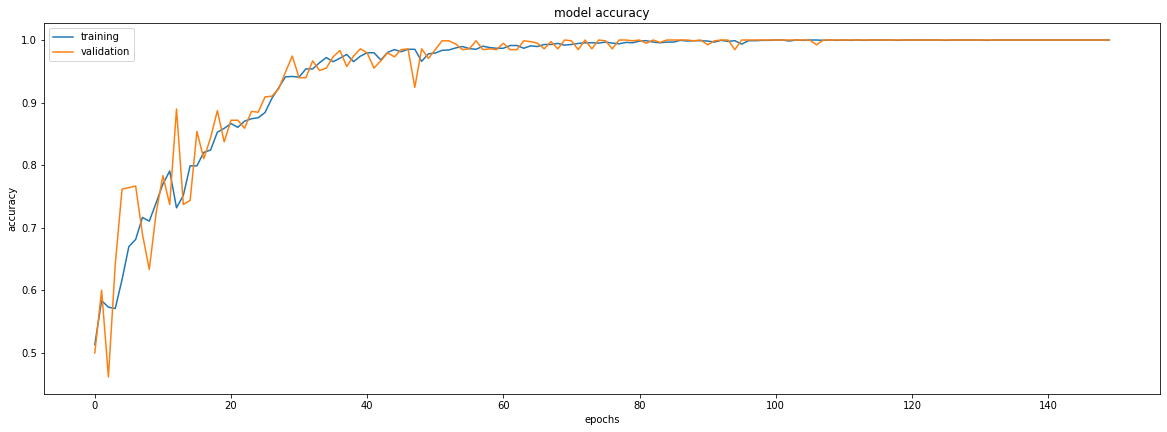

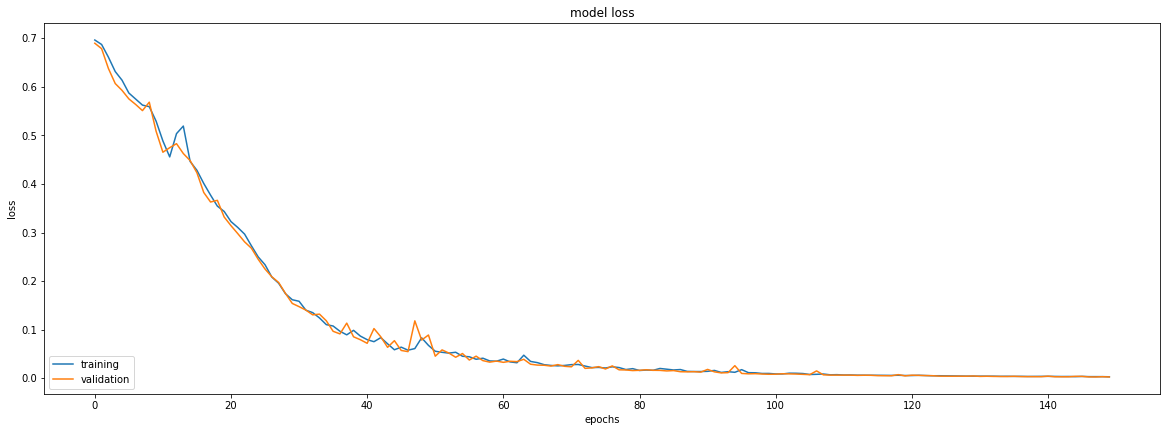

In [ ]:
# Plot Metrics 

plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

plt.figure(figsize = (20,15))
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='lower left')
plt.show()

# Prepare test data

In [ ]:
# to predict: 
base_test_path = "master_thesis_dataset/testData/"

t_cols = [i for i in range(1, 12)]
tdf_2007_rt = pd.read_csv(base_test_path + '1020-07_10readings.csv', index_col=0, usecols=t_cols)
tdf_2010_rt = pd.read_csv(base_test_path + '1020-10_10readings.csv', index_col=0, usecols=t_cols)
tdf_2016_rt = pd.read_csv(base_test_path + '1020-16_10readings.csv', index_col=0, usecols=t_cols)
tdf_2017_rt = pd.read_csv(base_test_path + '1020-17_10readings.csv', index_col=0, usecols=t_cols)
tdf_2021_rt = pd.read_csv(base_test_path + '1020-21_10readings.csv', index_col=0, usecols=t_cols)
tdf_2103_rt = pd.read_csv(base_test_path + '1021-03_10readings.csv', index_col=0, usecols=t_cols)
tdf_2105_rt = pd.read_csv(base_test_path + '1021-05_10readings.csv', index_col=0, usecols=t_cols)
tdf_2115_rt = pd.read_csv(base_test_path + '1021-15_10readings.csv', index_col=0, usecols=t_cols)
tdf_2117_rt = pd.read_csv(base_test_path + '1021-17_10readings.csv', index_col=0, usecols=t_cols)
tdf_2008_rt = pd.read_csv(base_test_path + '1020-08_10readings.csv', index_col=0, usecols=t_cols)
tdf_2009_rt = pd.read_csv(base_test_path + '1020-09_10readings.csv', index_col=0, usecols=t_cols)

test_path_pressure = "master_thesis_dataset/pressureData/testData_pressure/"
p_cols = [i for i in range(1,22)]

# for 1bar :
tdf_2103_1bar = pd.read_csv(test_path_pressure + '1021-03_1bar_20readings.csv', index_col=0, usecols=p_cols) 
tdf_2105_1bar = pd.read_csv(test_path_pressure + '1021-05_1bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2115_1bar = pd.read_csv(test_path_pressure + '1021-15_1bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2117_1bar = pd.read_csv(test_path_pressure + '1021-17_1bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2007_1bar = pd.read_csv(test_path_pressure + '1020-07_1bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2010_1bar = pd.read_csv(test_path_pressure + '1020-10_1bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2016_1bar = pd.read_csv(test_path_pressure + '1020-16_1bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2017_1bar = pd.read_csv(test_path_pressure + '1020-17_1bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2021_1bar = pd.read_csv(test_path_pressure + '1020-21_1bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2008_1bar = pd.read_csv(test_path_pressure + '1020-08_1bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2009_1bar = pd.read_csv(test_path_pressure + '1020-09_1bar_20readings.csv', index_col=0, usecols=p_cols)

# for 2 bar :
tdf_2103_2bar = pd.read_csv(test_path_pressure + '1021-03_2bar_20readings.csv', index_col=0, usecols=p_cols) 
tdf_2105_2bar = pd.read_csv(test_path_pressure + '1021-05_2bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2115_2bar = pd.read_csv(test_path_pressure + '1021-15_2bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2117_2bar = pd.read_csv(test_path_pressure + '1021-17_2bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2007_2bar = pd.read_csv(test_path_pressure + '1020-07_2bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2010_2bar = pd.read_csv(test_path_pressure + '1020-10_2bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2016_2bar = pd.read_csv(test_path_pressure + '1020-16_2bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2017_2bar = pd.read_csv(test_path_pressure + '1020-17_2bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2021_2bar = pd.read_csv(test_path_pressure + '1020-21_2bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2008_2bar = pd.read_csv(test_path_pressure + '1020-08_2bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2009_2bar = pd.read_csv(test_path_pressure + '1020-09_2bar_20readings.csv', index_col=0, usecols=p_cols)

# for 3 bar :
tdf_2007_3bar = pd.read_csv(test_path_pressure + '1020-07_3bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2010_3bar = pd.read_csv(test_path_pressure + '1020-10_3bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2016_3bar = pd.read_csv(test_path_pressure + '1020-16_3bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2017_3bar = pd.read_csv(test_path_pressure + '1020-17_3bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2021_3bar = pd.read_csv(test_path_pressure + '1020-21_3bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2008_3bar = pd.read_csv(test_path_pressure + '1020-08_3bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2009_3bar = pd.read_csv(test_path_pressure + '1020-09_3bar_20readings.csv', index_col=0, usecols=p_cols)

# for 4 bar :
tdf_2103_4bar = pd.read_csv(test_path_pressure + '1021-03_4bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2105_4bar = pd.read_csv(test_path_pressure + '1021-05_4bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2115_4bar = pd.read_csv(test_path_pressure + '1021-15_4bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2117_4bar = pd.read_csv(test_path_pressure + '1021-17_4bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2007_4bar = pd.read_csv(test_path_pressure + '1020-07_4bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2010_4bar = pd.read_csv(test_path_pressure + '1020-10_4bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2016_4bar = pd.read_csv(test_path_pressure + '1020-16_4bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2017_4bar = pd.read_csv(test_path_pressure + '1020-17_4bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2021_4bar = pd.read_csv(test_path_pressure + '1020-21_4bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2008_4bar = pd.read_csv(test_path_pressure + '1020-08_4bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2009_4bar = pd.read_csv(test_path_pressure + '1020-09_4bar_20readings.csv', index_col=0, usecols=p_cols)

# for 6 bar :
tdf_2103_6bar = pd.read_csv(test_path_pressure + '1021-03_6bar_20readings.csv', index_col=0, usecols=p_cols) 
tdf_2105_6bar = pd.read_csv(test_path_pressure + '1021-05_6bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2115_6bar = pd.read_csv(test_path_pressure + '1021-15_6bar_20readings.csv', index_col=0, usecols=p_cols)
tdf_2117_6bar = pd.read_csv(test_path_pressure + '1021-17_6bar_20readings.csv', index_col=0, usecols=p_cols)

# Test data without window of inflection concept

In [ ]:
# preparing test data dictionary
testData_dict = {'2103': {'rt': tdf_2103_rt.values/15, 
                          '1bar': tdf_2103_1bar.values/15, 
                          '2bar': tdf_2103_2bar.values/15, 
                          '4bar': tdf_2103_4bar.values/15, 
                          '6bar': tdf_2103_6bar.values/15,
                          '05deg': (df_2103_05deg.values/15)[:, 80:],
                          '15deg': (df_2103_15deg.values/15)[:, 80:], 
                          '25deg': (df_2103_25deg.values/15)[:, 80:], 
                          '35deg': (df_2103_35deg.values/15)[:, 80:], 
                          '45deg': (df_2103_45deg.values/15)[:, 80:]},
                 '2105': {'rt': (tdf_2105_rt.values/15)[:, 0:1], 
                          '1bar': (tdf_2105_1bar.values/15)[:, 0:2], 
                          '2bar': (tdf_2105_2bar.values/15)[:, 0:2], 
                          '4bar': (tdf_2105_4bar.values/15)[:, 0:2], 
                          '6bar': (tdf_2105_6bar.values/15)[:, 0:2],
                          '05deg': (df_2105_05deg.values/15)[:, 80:82],
                          '15deg': (df_2105_15deg.values/15)[:, 80:82], 
                          '25deg': (df_2105_25deg.values/15)[:, 80:82], 
                          '35deg': (df_2105_35deg.values/15)[:, 80:82], 
                          '45deg': (df_2105_45deg.values/15)[:, 80:82]},
                 '2115': {'rt': (tdf_2115_rt.values/15)[:, 0:1], 
                          '1bar': (tdf_2115_1bar.values/15)[:, 0:2], 
                          '2bar': (tdf_2115_2bar.values/15)[:, 0:2], 
                          '4bar': (tdf_2115_4bar.values/15)[:, 0:2], 
                          '6bar': (tdf_2115_6bar.values/15)[:, 0:2],
                          '05deg': (df_2115_05deg.values/15)[:, 80:82],
                          '15deg': (df_2115_15deg.values/15)[:, 80:82], 
                          '25deg': (df_2115_25deg.values/15)[:, 80:82], 
                          '35deg': (df_2115_35deg.values/15)[:, 80:82], 
                          '45deg': (df_2115_45deg.values/15)[:, 80:82]},
                 '2117': {'rt': (tdf_2117_rt.values/15)[:, 0:1], 
                          '1bar': (tdf_2117_1bar.values/15)[:, 0:2], 
                          '2bar': (tdf_2117_2bar.values/15)[:, 0:2], 
                          '4bar': (tdf_2117_4bar.values/15)[:, 0:2], 
                          '6bar': (tdf_2117_6bar.values/15)[:, 0:2],
                          '05deg': (df_2117_05deg.values/15)[:, 80:82],
                          '15deg': (df_2117_15deg.values/15)[:, 80:82], 
                          '25deg': (df_2117_25deg.values/15)[:, 80:82], 
                          '35deg': (df_2117_35deg.values/15)[:, 80:82], 
                          '45deg': (df_2117_45deg.values/15)[:, 80:82]},
                 '2007': {'rt': (tdf_2007_rt.values/15)[:, 0:1], 
                          '1bar': (tdf_2007_1bar.values/15)[:, 0:2], 
                          '2bar': (tdf_2007_2bar.values/15)[:, 0:2], 
                          '3bar': (tdf_2007_3bar.values/15)[:, 0:2], 
                          '4bar': (tdf_2007_4bar.values/15)[:, 0:2],
                          '05deg': (df_2007_05deg.values/15)[:, 80:82],
                          '15deg': (df_2007_15deg.values/15)[:, 80:82], 
                          '25deg': (df_2007_25deg.values/15)[:, 80:82], 
                          '35deg': (df_2007_35deg.values/15)[:, 80:82], 
                          '45deg': (df_2007_45deg.values/15)[:, 80:82]},
                 '2010': {'rt': (tdf_2010_rt.values/15)[:, 0:1], 
                          '1bar': (tdf_2010_1bar.values/15)[:, 0:2], 
                          '2bar': (tdf_2010_2bar.values/15)[:, 0:2], 
                          '3bar': (tdf_2010_3bar.values/15)[:, 0:2], 
                          '4bar': (tdf_2010_4bar.values/15)[:, 0:2],
                          '05deg': (df_2010_05deg.values/15)[:, 80:82],
                          '15deg': (df_2010_15deg.values/15)[:, 80:82], 
                          '25deg': (df_2010_25deg.values/15)[:, 80:82], 
                          '35deg': (df_2010_35deg.values/15)[:, 80:82], 
                          '45deg': (df_2010_45deg.values/15)[:, 80:82]},
                 '2016': {'rt': (tdf_2016_rt.values/15)[:, 0:1], 
                          '1bar': (tdf_2016_1bar.values/15)[:, 0:2], 
                          '2bar': (tdf_2016_2bar.values/15)[:, 0:2], 
                          '3bar': (tdf_2016_3bar.values/15)[:, 0:2], 
                          '4bar': (tdf_2016_4bar.values/15)[:, 0:2],
                          '05deg': (df_2016_05deg.values/15)[:, 80:82],
                          '15deg': (df_2016_15deg.values/15)[:, 80:82], 
                          '25deg': (df_2016_25deg.values/15)[:, 80:82], 
                          '35deg': (df_2016_35deg.values/15)[:, 80:82], 
                          '45deg': (df_2016_45deg.values/15)[:, 80:82]},
                 '2017': {'rt': (tdf_2017_rt.values/15)[:, 0:1], 
                          '1bar': (tdf_2017_1bar.values/15)[:, 0:2], 
                          '2bar': (tdf_2017_2bar.values/15)[:, 0:2], 
                          '3bar': (tdf_2017_3bar.values/15)[:, 0:2], 
                          '4bar': (tdf_2017_4bar.values/15)[:, 0:2],
                          '05deg': (df_2017_05deg.values/15)[:, 80:82],
                          '15deg': (df_2017_15deg.values/15)[:, 80:82], 
                          '25deg': (df_2017_25deg.values/15)[:, 80:82], 
                          '35deg': (df_2017_35deg.values/15)[:, 80:82], 
                          '45deg': (df_2017_45deg.values/15)[:, 80:82]},
                 '2021': {'rt': (tdf_2021_rt.values/15)[:, 0:1], 
                          '1bar': (tdf_2021_1bar.values/15)[:, 0:2], 
                          '2bar': (tdf_2021_2bar.values/15)[:, 0:2], 
                          '3bar': (tdf_2021_3bar.values/15)[:, 0:2], 
                          '4bar': (tdf_2021_4bar.values/15)[:, 0:2],
                          '05deg': (df_2021_05deg.values/15)[:, 80:82],
                          '15deg': (df_2021_15deg.values/15)[:, 80:82], 
                          '25deg': (df_2021_25deg.values/15)[:, 80:82], 
                          '35deg': (df_2021_35deg.values/15)[:, 80:82], 
                          '45deg': (df_2021_45deg.values/15)[:, 80:82]},
                 '2008': {'rt': (tdf_2008_rt.values/4)[:, 0:1], 
                          '1bar': (tdf_2008_1bar.values/4)[:, 0:2], 
                          '2bar': (tdf_2008_2bar.values/4)[:, 0:2], 
                          '3bar': (tdf_2008_3bar.values/4)[:, 0:2],
                          '4bar': (tdf_2008_4bar.values/4)[:, 0:2],
                          '05deg': (df_2008_05deg.values/4)[:, 80:82],
                          '15deg': (df_2008_15deg.values/4)[:, 80:82], 
                          '25deg': (df_2008_25deg.values/4)[:, 80:82], 
                          '35deg': (df_2008_35deg.values/4)[:, 80:82], 
                          '45deg': (df_2008_45deg.values/4)[:, 80:82]},
                 '2009': {'rt': (tdf_2009_rt.values/4)[:, 0:1], 
                          '1bar': (tdf_2009_1bar.values/4)[:, 0:2], 
                          '2bar': (tdf_2009_2bar.values/4)[:, 0:2], 
                          '3bar': (tdf_2009_3bar.values/4)[:, 0:2], 
                          '4bar': (tdf_2009_4bar.values/4)[:, 0:2],
                          '05deg': (df_2009_05deg.values/4)[:, 80:82],
                          '15deg': (df_2009_15deg.values/4)[:, 80:82], 
                          '25deg': (df_2009_25deg.values/4)[:, 80:82], 
                          '35deg': (df_2009_35deg.values/4)[:, 80:82], 
                          '45deg': (df_2009_45deg.values/4)[:, 80:82]}
                }

# Test data with window of inflection concept

In [ ]:
# preparing test data dictionary
testData_dict = {'2103': {'rt': tdf_2103_rt.values[790:1790]/15, 
                          '1bar': tdf_2103_1bar.values[790:1790]/15, 
                          '2bar': tdf_2103_2bar.values[790:1790]/15, 
                          '4bar': tdf_2103_4bar.values[790:1790]/15, 
                          '6bar': tdf_2103_6bar.values[790:1790]/15,
                          '05deg': (df_2103_05deg.values[790:1790]/15)[:, 80:],
                          '15deg': (df_2103_15deg.values[790:1790]/15)[:, 80:], 
                          '25deg': (df_2103_25deg.values[790:1790]/15)[:, 80:], 
                          '35deg': (df_2103_35deg.values[790:1790]/15)[:, 80:], 
                          '45deg': (df_2103_45deg.values[790:1790]/15)[:, 80:]},
                 '2105': {'rt': (tdf_2105_rt.values[790:1790]/15)[:, 0:1], 
                          '1bar': (tdf_2105_1bar.values[790:1790]/15)[:, 0:2], 
                          '2bar': (tdf_2105_2bar.values[790:1790]/15)[:, 0:2], 
                          '4bar': (tdf_2105_4bar.values[790:1790]/15)[:, 0:2], 
                          '6bar': (tdf_2105_6bar.values[790:1790]/15)[:, 0:2],
                          '05deg': (df_2105_05deg.values[790:1790]/15)[:, 80:82],
                          '15deg': (df_2105_15deg.values[790:1790]/15)[:, 80:82], 
                          '25deg': (df_2105_25deg.values[790:1790]/15)[:, 80:82], 
                          '35deg': (df_2105_35deg.values[790:1790]/15)[:, 80:82], 
                          '45deg': (df_2105_45deg.values[790:1790]/15)[:, 80:82]},
                 '2115': {'rt': (tdf_2115_rt.values[790:1790]/15)[:, 0:1], 
                          '1bar': (tdf_2115_1bar.values[790:1790]/15)[:, 0:2], 
                          '2bar': (tdf_2115_2bar.values[790:1790]/15)[:, 0:2], 
                          '4bar': (tdf_2115_4bar.values[790:1790]/15)[:, 0:2], 
                          '6bar': (tdf_2115_6bar.values[790:1790]/15)[:, 0:2],
                          '05deg': (df_2115_05deg.values[790:1790]/15)[:, 80:82],
                          '15deg': (df_2115_15deg.values[790:1790]/15)[:, 80:82], 
                          '25deg': (df_2115_25deg.values[790:1790]/15)[:, 80:82], 
                          '35deg': (df_2115_35deg.values[790:1790]/15)[:, 80:82], 
                          '45deg': (df_2115_45deg.values[790:1790]/15)[:, 80:82]},
                 '2117': {'rt': (tdf_2117_rt.values[790:1790]/15)[:, 0:1], 
                          '1bar': (tdf_2117_1bar.values[790:1790]/15)[:, 0:2], 
                          '2bar': (tdf_2117_2bar.values[790:1790]/15)[:, 0:2], 
                          '4bar': (tdf_2117_4bar.values[790:1790]/15)[:, 0:2], 
                          '6bar': (tdf_2117_6bar.values[790:1790]/15)[:, 0:2],
                          '05deg': (df_2117_05deg.values[790:1790]/15)[:, 80:82],
                          '15deg': (df_2117_15deg.values[790:1790]/15)[:, 80:82], 
                          '25deg': (df_2117_25deg.values[790:1790]/15)[:, 80:82], 
                          '35deg': (df_2117_35deg.values[790:1790]/15)[:, 80:82], 
                          '45deg': (df_2117_45deg.values[790:1790]/15)[:, 80:82]},
                 '2007': {'rt': (tdf_2007_rt.values[790:1790]/15)[:, 0:1], 
                          '1bar': (tdf_2007_1bar.values[790:1790]/15)[:, 0:2], 
                          '2bar': (tdf_2007_2bar.values[790:1790]/15)[:, 0:2], 
                          '3bar': (tdf_2007_3bar.values[790:1790]/15)[:, 0:2], 
                          '4bar': (tdf_2007_4bar.values[790:1790]/15)[:, 0:2],
                          '05deg': (df_2007_05deg.values[790:1790]/15)[:, 80:82],
                          '15deg': (df_2007_15deg.values[790:1790]/15)[:, 80:82], 
                          '25deg': (df_2007_25deg.values[790:1790]/15)[:, 80:82], 
                          '35deg': (df_2007_35deg.values[790:1790]/15)[:, 80:82], 
                          '45deg': (df_2007_45deg.values[790:1790]/15)[:, 80:82]},
                 '2010': {'rt': (tdf_2010_rt.values[790:1790]/15)[:, 0:1], 
                          '1bar': (tdf_2010_1bar.values[790:1790]/15)[:, 0:2], 
                          '2bar': (tdf_2010_2bar.values[790:1790]/15)[:, 0:2], 
                          '3bar': (tdf_2010_3bar.values[790:1790]/15)[:, 0:2], 
                          '4bar': (tdf_2010_4bar.values[790:1790]/15)[:, 0:2],
                          '05deg': (df_2010_05deg.values[790:1790]/15)[:, 80:82],
                          '15deg': (df_2010_15deg.values[790:1790]/15)[:, 80:82], 
                          '25deg': (df_2010_25deg.values[790:1790]/15)[:, 80:82], 
                          '35deg': (df_2010_35deg.values[790:1790]/15)[:, 80:82], 
                          '45deg': (df_2010_45deg.values[790:1790]/15)[:, 80:82]},
                 '2016': {'rt': (tdf_2016_rt.values[790:1790]/15)[:, 0:1], 
                          '1bar': (tdf_2016_1bar.values[790:1790]/15)[:, 0:2], 
                          '2bar': (tdf_2016_2bar.values[790:1790]/15)[:, 0:2], 
                          '3bar': (tdf_2016_3bar.values[790:1790]/15)[:, 0:2], 
                          '4bar': (tdf_2016_4bar.values[790:1790]/15)[:, 0:2],
                          '05deg': (df_2016_05deg.values[790:1790]/15)[:, 80:82],
                          '15deg': (df_2016_15deg.values[790:1790]/15)[:, 80:82], 
                          '25deg': (df_2016_25deg.values[790:1790]/15)[:, 80:82], 
                          '35deg': (df_2016_35deg.values[790:1790]/15)[:, 80:82], 
                          '45deg': (df_2016_45deg.values[790:1790]/15)[:, 80:82]},
                 '2017': {'rt': (tdf_2017_rt.values[790:1790]/15)[:, 0:1], 
                          '1bar': (tdf_2017_1bar.values[790:1790]/15)[:, 0:2], 
                          '2bar': (tdf_2017_2bar.values[790:1790]/15)[:, 0:2], 
                          '3bar': (tdf_2017_3bar.values[790:1790]/15)[:, 0:2], 
                          '4bar': (tdf_2017_4bar.values[790:1790]/15)[:, 0:2],
                          '05deg': (df_2017_05deg.values[790:1790]/15)[:, 80:82],
                          '15deg': (df_2017_15deg.values[790:1790]/15)[:, 80:82], 
                          '25deg': (df_2017_25deg.values[790:1790]/15)[:, 80:82], 
                          '35deg': (df_2017_35deg.values[790:1790]/15)[:, 80:82], 
                          '45deg': (df_2017_45deg.values[790:1790]/15)[:, 80:82]},
                 '2021': {'rt': (tdf_2021_rt.values[790:1790]/15)[:, 0:1], 
                          '1bar': (tdf_2021_1bar.values[790:1790]/15)[:, 0:2], 
                          '2bar': (tdf_2021_2bar.values[790:1790]/15)[:, 0:2], 
                          '3bar': (tdf_2021_3bar.values[790:1790]/15)[:, 0:2], 
                          '4bar': (tdf_2021_4bar.values[790:1790]/15)[:, 0:2],
                          '05deg': (df_2021_05deg.values[790:1790]/15)[:, 80:82],
                          '15deg': (df_2021_15deg.values[790:1790]/15)[:, 80:82], 
                          '25deg': (df_2021_25deg.values[790:1790]/15)[:, 80:82], 
                          '35deg': (df_2021_35deg.values[790:1790]/15)[:, 80:82], 
                          '45deg': (df_2021_45deg.values[790:1790]/15)[:, 80:82]},
                 '2008': {'rt': (tdf_2008_rt.values[790:1790]/4)[:, 0:1], 
                          '1bar': (tdf_2008_1bar.values[790:1790]/4)[:, 0:2], 
                          '2bar': (tdf_2008_2bar.values[790:1790]/4)[:, 0:2], 
                          '3bar': (tdf_2008_3bar.values[790:1790]/4)[:, 0:2],
                          '4bar': (tdf_2008_4bar.values[790:1790]/4)[:, 0:2],
                          '05deg': (df_2008_05deg.values[790:1790]/4)[:, 80:82],
                          '15deg': (df_2008_15deg.values[790:1790]/4)[:, 80:82], 
                          '25deg': (df_2008_25deg.values[790:1790]/4)[:, 80:82], 
                          '35deg': (df_2008_35deg.values[790:1790]/4)[:, 80:82], 
                          '45deg': (df_2008_45deg.values[790:1790]/4)[:, 80:82]},
                 '2009': {'rt': (tdf_2009_rt.values[790:1790]/4)[:, 0:1], 
                          '1bar': (tdf_2009_1bar.values[790:1790]/4)[:, 0:2], 
                          '2bar': (tdf_2009_2bar.values[790:1790]/4)[:, 0:2], 
                          '3bar': (tdf_2009_3bar.values[790:1790]/4)[:, 0:2], 
                          '4bar': (tdf_2009_4bar.values[790:1790]/4)[:, 0:2],
                          '05deg': (df_2009_05deg.values[790:1790]/4)[:, 80:82],
                          '15deg': (df_2009_15deg.values[790:1790]/4)[:, 80:82], 
                          '25deg': (df_2009_25deg.values[790:1790]/4)[:, 80:82], 
                          '35deg': (df_2009_35deg.values[790:1790]/4)[:, 80:82], 
                          '45deg': (df_2009_45deg.values[790:1790]/4)[:, 80:82]}
                }

In [ ]:
# Preparing the test set
test_data = []
test_labels = []
params =[]

for valve in testData_dict.keys():
    for param in testData_dict[valve].keys():
        if testData_dict[valve][param].shape[1] == 1:
            for i in range(0,1):
                test_data.append(testData_dict[valve][param][:, i])
                #print("valve is %s "%valve)
                test_labels.append(1)
                params.append((valve, param))
        elif testData_dict[valve][param].shape[1] == 2:
            for i in range(0,2):
                test_data.append(testData_dict[valve][param][:, i])
                #print("valve is %s "%valve)
                test_labels.append(1)
                params.append((valve, param))
        elif testData_dict[valve][param].shape[1] == 10:
            for i in range (0,10):
                test_data.append(testData_dict[valve][param][:, i])
                #print("valve is %s "%valve)
                test_labels.append(0)
                params.append((valve, param))
        elif testData_dict[valve][param].shape[1] == 20:
            for i in range(0,20):
                test_data.append(testData_dict[valve][param][:, i])
                #print("valve is %s "%valve)
                test_labels.append(0)
                params.append((valve, param))
        else:
            pass

In [ ]:
len(test_data)

380

In [ ]:
X_test = np.array(test_data, dtype='float')
y_test = np.array(test_labels)

# Evaluate and predict

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
results = model.evaluate(x=X_test, y=y_test, batch_size=32)
print('test loss, test accuracy:', results)

predictions = model.predict(x=X_test)
print('predictions shape:', predictions.shape)

380/380 [==============================] - 0s 180us/sample - loss: 0.2501 - acc: 0.9421
test loss, test accuracy: [0.25009273812671196, 0.94210523]
predictions shape: (380, 1)


# Plot confusion matrix 

In [ ]:
pred = np.ndarray.flatten(predictions)
pred.shape

(380,)

In [ ]:
class_labels = pred > 0.5
class_labels = class_labels.astype(int)
class_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
conf_matrix2 = confusion_matrix(y_true=y_test, y_pred=class_labels, labels=[0,1])
conf_matrix2

array([[170,  20],
       [  2, 188]])

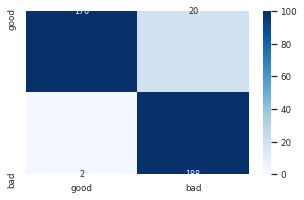

In [ ]:
classes=['good', 'bad']
df_cm = pd.DataFrame(conf_matrix2, index = classes, columns = classes)
plt.figure(figsize = (5,3))
sn.set(font_scale=0.8)
sn.heatmap(df_cm, annot=True, vmin=0, vmax=100, cmap="Blues", fmt="d", annot_kws={"size": 8})

# Save model and other results

In [ ]:
# To save a model (model's architecture, weights, and training configuration stored in a file/folder)
model.save('bin_class/bin_class_withWindow_noNoise')

In [ ]:
# to save loss and acc matrices to plot later
import pickle
with open('bin_class/bin_class_withWindow_noNoise_metrics.pickle', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to read the saved file:
#with open('<filename>', 'rb') as handle:
    #h_dict = pickle.load(handle)

In [ ]:
# to save confusion matrix:
with open('bin_class/bin_class_withWindow_noNoise_confMatrix.pickle', 'wb') as f:
    pickle.dump(conf_matrix2, f, protocol=pickle.HIGHEST_PROTOCOL)

# to load from file:
#with open('<filename>', 'rb') as f:
    #mat = pickle.load(f)

In [ ]:
# to zip saved model and pickle files
!zip -r /content/bin_class.zip /content/bin_class

  adding: content/bin_class/ (stored 0%)
  adding: content/bin_class/bin_class_withWindow_noNoise (deflated 44%)
  adding: content/bin_class/bin_class_withWindow_noNoise_metrics.pickle (deflated 71%)
  adding: content/bin_class/bin_class_withWindow_noNoise_confMatrix.pickle (deflated 22%)


In [ ]:
# to download the zipped files
from google.colab import files
files.download("/content/conv1D.zip")